<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/Colab%20code%20(graphs)/New_250526_Fluorescence_Parameters_Tukey_test_letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drawing a 'BOXPLOT' graph

Includes letters, showing the significant differences between variants, derived by the means of the Tukey's test.

Before everything else, parameters used inside this code should be defined. This is done to make corrections easier and avoid setting them inside the code.

In [390]:
# THIS COLAB NOTEBOOK SHOULD BE USED TO CALCULATE AND DRAW THE PARAMETERS OF THE PROMPT FLUORESCENCE

#!sudo locale-gen en_US.UTF-8
#!sudo update-locale

In [391]:
# PARAMETERS
# export (converted csv)_(plant species)_(method)_(date).csv
#csv_file = '/content/export3.csv'

indexes = ['', 'Phi_Po', 'Phi_Eo', 'Phi_Ro', 'Phi_Do', 'Pi_Abs', 'Fo', 'Fm', 'RC/CSo', 'RC/CSm', 'ABS/RC', 'gamma_chl']

parameter = indexes[5] # required column

In [392]:

group_order = [
     '1B', '1D', '2B', '2D', '3B', '3D', '4B', '4D', '5B', '5D',
]

group_order = [
  'v0', 'v0z', 'v1', 'v1z',  'v2', 'v2z',
  'v3', 'v3z', 'v4', 'v4z',  'v5', 'v5z',
  'v6', 'v6z', 'v7', 'v7z',
]

group_order = [
 '0', 'v0', 'v0z', '1', 'v1', 'v1z', '2', 'v2', 'v2z',
 '3', 'v3', 'v3z', '4', 'v4', 'v4z', '5', 'v5', 'v5z',
 '6', 'v6', 'v6z', '7', 'v7', 'v7z',
]

group_order = ['G', 'Gc', 'N4_04-24', 'N4_04-28', 'N13_04-24', 'N13_04-28']

group_order = ['Le', 'Le_c', 'Ls', 'Ls_c', 'Be', 'Be_c', 'Bs', 'Bs_c', 'Je', 'Je_c', 'Jsb', 'Jsb_c', 'Jsl', 'Jsl_c',
]

group_order = [
    '1A', '1B', '1D', '2A', '2B', '2D', '3A', '3B', '3D', '4A', '4B', '4D', '5A', '5B', '5D',
]

group_order = [
    '2_m', '2_n', '3_m', '3_n', '4_m', '4_n', '5_m', '5_n', '6_m', '6_n',
    '7_m', '7_n', '8_m', '8_n', '9_m', '9_n', '10_m', '10_n',
  ]



In [393]:
group_order = [
    'Lp M', 'Lp N', 'Ac M', 'Ac N', 'Ad M', 'Ad N', 'Fa M', 'Fa N', 'Fp M', 'Fp N',
    'Fr M', 'Fr N', 'Bi M', 'Bi N',
  ]

In [394]:
stacked = False
sorting = False
abbreviations = False

y_label = '[a.u.]'
title_main =  ''

sorting_labels = 'groups' # or 'group'

def set_groups():
  group_order = unique_non_numeric_list(df['groups'])

  # Използваме ordered set за да запазим уникалните елементи в реда на поява
  group_order = list(dict.fromkeys(group_order))

  # Отпечатваме резултата
  print(group_order)

#set_groups()

####1) importing of the libraries and the **.csv** file

The columns of this table file should containt parameters, whereas the group variants written as indexes of the rows. These indexes will be shown in the first column, named *'groups'*.

the delimiter is usually a semicolon ```;```, but can be a tabulation ```\t```


In [395]:
import pandas as pd
import numpy as np
import os

# Get the list of files in the current directory
files = os.listdir('.')

# Find the CSV file
csv_file = [file for file in files if file.endswith('.csv')][0]

file_name_type = csv_file.split('_')[1]
print (csv_file, file_name_type)

gr_240814.csv 240814.csv


In [396]:
def try_read_csv(delimiter):
    df = pd.read_csv(csv_file, delimiter=delimiter, decimal='.', nrows=1, skiprows=5)
    if df.columns[0] != 'index':
        raise pd.errors.ParserError("Incorrect delimiter")
    return pd.read_csv(csv_file, delimiter=delimiter, decimal='.', skiprows=5, encoding='utf-8')  # Връща df, ако делимитерът е правилен

In [397]:
for delimiter in [';', '\t', ',']:
    try:
        df = try_read_csv(delimiter)
        break  # Излиза от цикъла, ако е намерен правилния делимитер
    except pd.errors.ParserError:
        pass  # Преминава към следващия делимитер
else:
    raise pd.errors.ParserError("Could not determine delimiter")  # Хвърля грешка, ако никой от делимитерите не е правилен

In [398]:
# обработка на csv файла, така че да се преобразува във вида, подходящ за ползване от кода
df.set_index('index', inplace=True)
df = df.T
df = df.reset_index()
df = df.rename(columns={'index': 'groups'})
df['groups'] = df['groups'].apply(lambda x: x.split('.')[0])
df = df[~df['groups'].str.contains('Unnamed')]

In [399]:
import re

def is_numeric(item):
  return isinstance(item, int) or (isinstance(item, str) and item.isdigit())

def unique_non_numeric_list(input_list):
  unique_list = []
  [unique_list.append(x) for x in input_list if x not in unique_list and not is_numeric(x)]
  return unique_list


In [400]:
# Get a list of rows to keep
rows_to_keep = df['groups'].apply(lambda x: x in group_order)

# Filter the DataFrame
df = df[rows_to_keep]

In [401]:
if (sorting):
  df = df.sort_values(by="groups", key=lambda column: column.map(lambda e: group_order.index(e)))

In [402]:
group_order

['Lp M',
 'Lp N',
 'Ac M',
 'Ac N',
 'Ad M',
 'Ad N',
 'Fa M',
 'Fa N',
 'Fp M',
 'Fp N',
 'Fr M',
 'Fr N',
 'Bi M',
 'Bi N']

1.2) Popping out the labels of the variation groups in a dataframe, called *'names'*.
Transposing the dataframe, so that it can be easily processed by the covariance test analysis and matplotlib. Converting it into numpy array.

In [403]:
# print the resulting DataFrame
#print(df)
named = np.array(df.pop(sorting_labels))
transposed_df = df

In [404]:
#transposed_df[parameter].astype(float).max()

1.3) An optional step required to abbreviate the longer latin names of the crops, so that they can fit in the graph.

In [405]:
#ABBREVIATION
if abbreviations:
  try:
      print('before: ', named)
      import re
      # Abbreviating the latin names from 'Aaaaa aaaaaa (L.)' to 'A. aaaaaa (L.)'
      for i in range(len(named)):
          c = named[i][0]
          #named[i] = re.sub(r'[A-Z]([a-z]+ )', c + '. ', named[i])
          named[i] = "".join(re.findall(r'\b\w', named[i]))

      print('after: ', named)
  except:
      print(named.astype(int))
      named=named.astype(int)
      print('latin names not present')

1.4) Popping out the column with the desired parameter by writing the name in the 'pop' function, as well as transposing it.

This short code is used to perform calculations, based on the compound parameters, we would like to obtain from the original data. For example we would want to find out the values of the parameter 'RC/CS$_o$'. Thus, we can use the already present in the raw data 'F$_o$', 'ABS/RC' and divide them to obtain the needed parameter.

In [406]:
from logging import exception
#DERIVED PARAMETERS
def derivations(params, y_height=1, y_dist=1, title_main=''):
    Fi_params = df.pop('Fi').astype(int)
    Fo_params = df.pop('Fo').astype(int)
    Fm_params = df.pop('Fm').astype(int)
    ABS_params = df.pop('ABS/RC').astype(float)

    if params == 'Phi_Ro':
        y_height = 0.4 # height of the graph
        y_dist = 0.1 # distance between labels
        title_main = '\u03C6$_{Ro}$ '
        derived_params = (Fm_params- Fi_params)/Fm_params

    elif params == 'Phi_Eo':
        y_height = 0.7 # height of the graph
        y_dist = 0.2 # distance between labels
        title_main = '\u03C6$_{Eo}$ '
        derived_params = transposed_df[params]

    elif params == 'Phi_Po':
        y_height = 1 # height of the graph
        y_dist = 0.2 # distance between labels
        title_main = '\u03C6$_{Po}$ '
        derived_params = transposed_df[params]

    elif params == 'Phi_Do':
        derived_params = transposed_df[params].astype(float)
        y_height = np.round(derived_params.max(), 2)+0.02 # height of the graph
        y_dist = 0.1 # distance between labels
        title_main = '\u03C6$_{Do}$ '

    elif params == 'Pi_Abs':
        derived_params = transposed_df[params].astype(float)
        y_height = np.round(derived_params.max())+0.5 # height of the graph
        y_dist = 2 # distance between labels
        title_main = 'PI $_{ABS}$ '

    elif params == 'gamma_chl':
        y_height = 0.5 # height of the graph
        y_dist = 0.1 # distance between labels
        title_main = '\u03B3$_{chl}$'
        derived_params = 1/(ABS_params + 1)

    elif params == 'RC/CSo':
        y_height = 8000 # height of the graph
        y_dist = 2000 # distance between labels
        title_main = 'RC/CS$_O$'
        derived_params = Fo_params/ABS_params

    elif params == 'RC/CSm':
        y_height = 45000 # height of the graph
        y_dist = 10000 # distance between labels
        title_main = 'RC/CS$_M$'
        derived_params = Fm_params/ABS_params

    elif params == 'Fo':
        y_height = 17000 # height of the graph
        y_dist = 2000 # distance between labels
        title_main = 'ABS/CS$_O$ (F$_{O}$)'
        derived_params = Fo_params

    elif params == 'Fm':
        y_height = 90000 # height of the graph
        y_dist = 20000 # distance between labels
        title_main = 'ABS/CS$_M$ (F$_{M}$)'
        derived_params = Fm_params

    elif params == 'ABS/RC':
        y_height = np.round(ABS_params.max())+0.5 # height of the graph
        y_dist = 1 # distance between labels
        title_main = 'ABS/RC'
        derived_params = ABS_params

    else:
        params = df.pop(parameter) #required param
        derived_params = pd.to_numeric(params.T)

    data = pd.DataFrame({
        'Variant': named,
        'Value': derived_params
    })

    return data, y_height, y_dist, title_main

1.5) Converting the dataframe into a 1D numpy array

####2) arranging the data by samples column-wise and taking out the names of the variants in a different array

Converting the 2-D pandas dataframe into a 1-D numpy array. ```numpy.append(array1, array2) ``` can be used to append two arrays.

Probably ```pandas.dataframe.pop()``` can be used as well.

In [407]:
if not stacked:
  try:
      data, y_height, y_dist, title_main = derivations(parameter) #, y_height, y_dist, title_main)
  except Exception as e:
      print(e)
      params = df.pop(parameter) #required param
      derived_params = params.T #pd.to_numeric(params.T)
      print('no params')
      data = pd.DataFrame({
          'Variant': named,
          'Value': derived_params
      })

In [408]:
data

,Variant,Value
0,Lp M,2.298
1,Lp M,2.715
2,Lp M,3.575
3,Ac M,2.416
4,Ac M,2.211
5,Ac M,2.487
6,Ac M,2.562
7,Ad M,2.173
8,Ad M,1.837
9,Ad M,1.786


3) performing the co-variance test
(the following is a variant, showing the t-test)
(currently not shown)

In [409]:
y_height

np.float64(6.5)

In [410]:

#data['Variant'] = data['Variant'].apply(lambda x: x[:-1] if x.endswith(('a', 'b')) else x)

#data['Variant']

In [411]:
import statsmodels.stats.multicomp as mc

value = 'Value' #'8 TAC' #'Value'
variant = 'Variant' #'8 groups' #'Variant'
sorting_labels = variant
if stacked: data = df
old_data = data
dataVariant = data #data[~data[variant].str.endswith('N')]

# Perform one-way ANOVA to check for significant differences
model = mc.MultiComparison(dataVariant[value].astype('float'), dataVariant[variant])
#model = mc.MultiComparison(data['6 TAC'], data['6 groups'])
result = model.tukeyhsd()
#print(np.sum(result.reject), len(result.reject))
#result.groups[result.pvalues < 0.05]
#result.groups[result.reject==True]
# The null hypothesis H0 for the test states that the means of the tested groups are equal.
result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Ac M,Ac N,-0.4557,0.9992,-2.1698,1.2585,False
Ac M,Ad M,-0.2212,1.0,-1.8082,1.3657,False
Ac M,Ad N,-1.771,0.0375,-3.4851,-0.0569,True
Ac M,Bi M,0.7343,0.9475,-0.9798,2.4485,False
Ac M,Bi N,-0.503,0.9956,-2.09,1.084,False
Ac M,Fa M,1.163,0.468,-0.5511,2.8771,False
Ac M,Fa N,1.5327,0.1182,-0.1815,3.2468,False
Ac M,Fp M,2.3697,0.0013,0.6555,4.0838,True
Ac M,Fp N,2.5748,0.0001,0.9878,4.1617,True
Ac M,Fr M,-1.2387,0.3716,-2.9528,0.4755,False


In [412]:
print(np.where(np.round(result.meandiffs, 2) == 0.53)) # 46 Bi 85 Fr

(array([42]),)


In [413]:
result_list = result.groupsunique.tolist()
all_groups = []

while result_list:
  for n in result_list:
    if result_list[0] != n:
      all_groups.append(str(result_list[0] + n))
  result_list.pop(0)

print(np.where(result.pvalues >= 0.05)[0])
print(np.where(np.logical_and(result.pvalues < 0.05, result.pvalues >= 0.01))[0])
print(np.where(np.logical_and(result.pvalues < 0.01, result.pvalues >= 0.001))[0])
print(np.where(result.pvalues < 0.001)[0])

ind = np.where(result.pvalues < 0.001)[0]

#for i in ind:
#  print(all_groups[i])

[ 0  1  3  4  5  6  9 10 11 12 13 14 15 16 17 21 22 23 24 25 26 27 28 32
 33 34 35 37 42 43 46 47 48 49 53 54 55 59 60 61 62 63 64 65 68 69 70 71
 74 75 76 85 86 87 90]
[ 2 18 29 45 50 51 79 88 89]
[ 7 36 44 52 56 66 80 83]
[ 8 19 20 30 31 38 39 40 41 57 58 67 72 73 77 78 81 82 84]


In [414]:
import scipy.stats as stats
import matplotlib.pyplot as plt

y_ticks = np.round(np.arange(0, y_height, y_dist), 1)
y_ticks

array([0., 2., 4., 6.])

In [415]:
print (value, sorting_labels)

Value Variant


In [416]:
# define columns for data and then grouping
col_to_group=sorting_labels
col_for_data=value
data = dataVariant

#Now take teh data and regroup for anova
samples = [cols[1] for cols in data.groupby(col_to_group)[col_for_data]]

# Предполагаме, че samples е списък от pandas Series
# Пример: samples = [pd.Series([1, 2]), pd.Series([3, 4, 5]), pd.Series([6])]

# Извличаме всички стойности от всички Series в един плосък списък
all_values = []
for series in samples:
    all_values.extend(series.tolist())

# Конвертираме плоския списък в numpy масив
samples = np.array(all_values, dtype='float32')

print(samples.shape, data.shape, data)


#I am not sure how this works but it makes an numpy array for each group
samples = np.asarray(samples).astype('float')
f_val, p_val = stats.f_oneway(*samples)
# I am not sure what this star does but this passes all the numpy arrays correctly
#print(samples)
# this if statement can be uncommmented if you don't won't to go furhter with out p<0.05
#if p_val<0.05:    #If the p value is less than 0.05 it then does the tukey
mod = mc.MultiComparison(data[col_for_data].astype('float'), data[col_to_group])
thsd=mod.tukeyhsd()

#this is a function to do Piepho method.
#AN Alogrithm for a letter based representation of al-pairwise comparisons.
tot=len(thsd.groupsunique)
#print(thsd.groupsunique)
#make an empty dataframe that is a square matrix of size of the groups. #set first column to 1
df_ltr=pd.DataFrame(np.nan, index=np.arange(tot),columns=np.arange(tot))
#df_ltr.iloc[:,0]=1
df_ltr[df_ltr.columns[0]] = 1
#df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)

count=0
#df_nms = pd.DataFrame('', index=np.arange(tot), columns=['names'])

# I make a dummy dataframe to put axis labels into.  sd stands for signifcant difference

for i in np.arange(tot):   #I loop through and make all pairwise comparisons.
    for j in np.arange(i+1,tot):
        if thsd.reject[count]:
            for cn in np.arange(tot):
                #print('i=',i,'j=',j,'cn=', cn, df_ltr)
                if df_ltr.iloc[i,cn]==1 and df_ltr.iloc[j,cn]==1:
                  #If the column contains both i and j shift and duplicat
                    df_ltr=pd.concat([df_ltr.iloc[:,:cn+1],df_ltr.iloc[:,cn+1:].T.shift().T],axis=1)
                    #print('i=',i,'j=',j,'cn=', cn, df_ltr)
                    df_ltr[df_ltr.columns[cn+1]]=df_ltr[df_ltr.columns[cn]]
                    df_ltr.iloc[i,cn]=0
                    df_ltr.iloc[j,cn+1]=0
                    print('i=',i,'j=',j,'cn=', cn, df_ltr)
                #Now we need to check all columns for abosortpion.
                for cleft in np.arange(len(df_ltr.columns)-1):
                    for cright in np.arange(cleft+1,len(df_ltr.columns)):
                        if (df_ltr[df_ltr.columns[cleft]].isna()).all()==False and (df_ltr[df_ltr.columns[cright]].isna()).all()==False:
                            if (df_ltr[df_ltr.columns[cleft]]>=df_ltr[df_ltr.columns[cright]]).all()==True:
                                print('ri=',i,'j=',j,'cn=', cn, "cright", cright, df_ltr)
                                df_ltr[df_ltr.columns[cright]]=0

                                df_ltr=pd.concat([df_ltr[df_ltr.columns[:cright]],df_ltr[df_ltr.columns[cright:]].T.shift(-1).T],axis=1)
                                print('ri=',i,'j=',j,'cn=', cn, "cright", cright, df_ltr)
                            if (df_ltr[df_ltr.columns[cleft]]<=df_ltr[df_ltr.columns[cright]]).all()==True:
                                df_ltr[df_ltr.columns[cleft]]=0
                                print('li=',i,'j=',j,'cn=', cn, "cleft", cleft, df_ltr)
                                df_ltr=pd.concat([df_ltr[df_ltr.columns[:cleft]],df_ltr[df_ltr.columns[cleft:]].T.shift(-1).T],axis=1)
                                print('li=',i,'j=',j,'cn=', cn, "cleft", cleft, df_ltr)

        count+=1
print ("after loop: ", df_ltr)
#I sort so that the first column becomes A
df_ltr=df_ltr.sort_values(by=list(df_ltr.columns),axis=1,ascending=False)
print ("after sorting: ", df_ltr)
# I assign letters to each column
for cn in np.arange(len(df_ltr.columns)):
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(1,chr(97+cn))
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(0,'')
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(np.nan,'')
    #print(df_ltr.columns[cn])

#I put all the letters into one string
df_ltr=df_ltr.astype(str)
df_ltr.sum(axis=1)
df_ltr



(47,) (47, 2)    Variant  Value
0     Lp M  2.298
1     Lp M  2.715
2     Lp M  3.575
3     Ac M  2.416
4     Ac M  2.211
5     Ac M  2.487
6     Ac M  2.562
7     Ad M  2.173
8     Ad M  1.837
9     Ad M  1.786
10    Ad M  2.995
11    Fa M  4.169
12    Fa M  2.013
13    Fa M  4.564
14    Fp M  4.998
15    Fp M  4.958
16    Fp M  4.410
17    Fr M  0.928
18    Fr M  1.159
19    Fr M  1.454
20    Bi M  3.285
21    Bi M  3.727
22    Bi M  2.448
23    Lp N  2.554
24    Lp N  2.154
25    Lp N  2.625
26    Lp N  2.777
27    Ac N  1.549
28    Ac N  1.768
29    Ac N  2.573
30    Ad N  0.989
31    Ad N  0.508
32    Ad N  0.447
33    Fa N  3.449
34    Fa N  4.306
35    Fa N  4.100
36    Fp N  5.660
37    Fp N  4.396
38    Fp N  3.830
39    Fp N  6.089
40    Fr N  0.342
41    Fr N  1.001
42    Fr N  1.088
43    Bi N  2.580
44    Bi N  1.666
45    Bi N  1.344
46    Bi N  2.074


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
/tmp/ipython-input-1377588302.py:25: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_val, p_val = stats.f_oneway(*samples)


i= 0 j= 3 cn= 0     0   1   2   3   4   5   6   7   8   9   10  11  12  13
0    0   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
1    1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
2    1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
3    1   0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
4    1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
5    1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
6    1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
7    1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
8    1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
9    1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
10   1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
11   1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
12   1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
13   1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
i= 0 j= 8 cn= 1     0   1   2   3   4   5   6   7   8   9   10  11  12  13
0    0   0   1 NaN NaN N

,6,5,4,3,2,1,0,7,8,9,10,11,12,13
0,a,b,c,d,,,,,,,,,,
1,a,b,c,,e,,,,,,,,,
2,a,b,c,,e,,,,,,,,,
3,,,,,e,,,,,,,,,
4,a,,,d,,f,,,,,,,,
5,a,b,c,,e,,,,,,,,,
6,a,,,d,,f,g,,,,,,,
7,,,,d,,f,g,,,,,,,
8,,,,,,f,g,,,,,,,
9,,,,,,,g,,,,,,,


In [417]:
#group_order = ['1','2','3','4','5']

In [418]:
new_df_ltr = np.array(df_ltr.sum(axis=1))
new_ltr = []
# ORDERING OF THE LETTERS!!!
for i in range(len(group_order)):
  ltr = [group_order[i], thsd.groupsunique.tolist().index(group_order[i]),
  new_df_ltr[thsd.groupsunique.tolist().index(group_order[i])]]
  print(ltr)
  new_ltr.append(ltr[2])
#print(np.array(df_ltr.sum(axis=1)), new_ltr)

['Lp M', 12, 'acd']
['Lp N', 13, 'acd']
['Ac M', 0, 'abcd']
['Ac N', 1, 'abce']
['Ad M', 2, 'abce']
['Ad N', 3, 'e']
['Fa M', 6, 'adfg']
['Fa N', 7, 'dfg']
['Fp M', 8, 'fg']
['Fp N', 9, 'g']
['Fr M', 10, 'bce']
['Fr N', 11, 'be']
['Bi M', 4, 'adf']
['Bi N', 5, 'abce']


In [419]:
def draw_letters(y, follow_bars=False, bplt=0, fsize=10, rotation=0):

  for i, grp in enumerate(pd.unique(data[variant].values)):   #I loop through the groups to make the scatters and figure out the axis labels.
      if follow_bars:
        y_pos = data[data[variant] == grp][value].max() + y * 0.91
      else:
        y_pos = y * 0.98 #y_pos = ax.get_ylim()[1]*1
      ax.text(i*1.+bplt, y_pos, new_ltr[i],
              rotation=rotation, fontsize=fsize, verticalalignment='top', horizontalalignment='center')

In [420]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [421]:
pd.unique(data[variant].values)

data[sorting_labels] = pd.Categorical(data[sorting_labels], categories=group_order, ordered=True)
data = data.sort_values(sorting_labels)

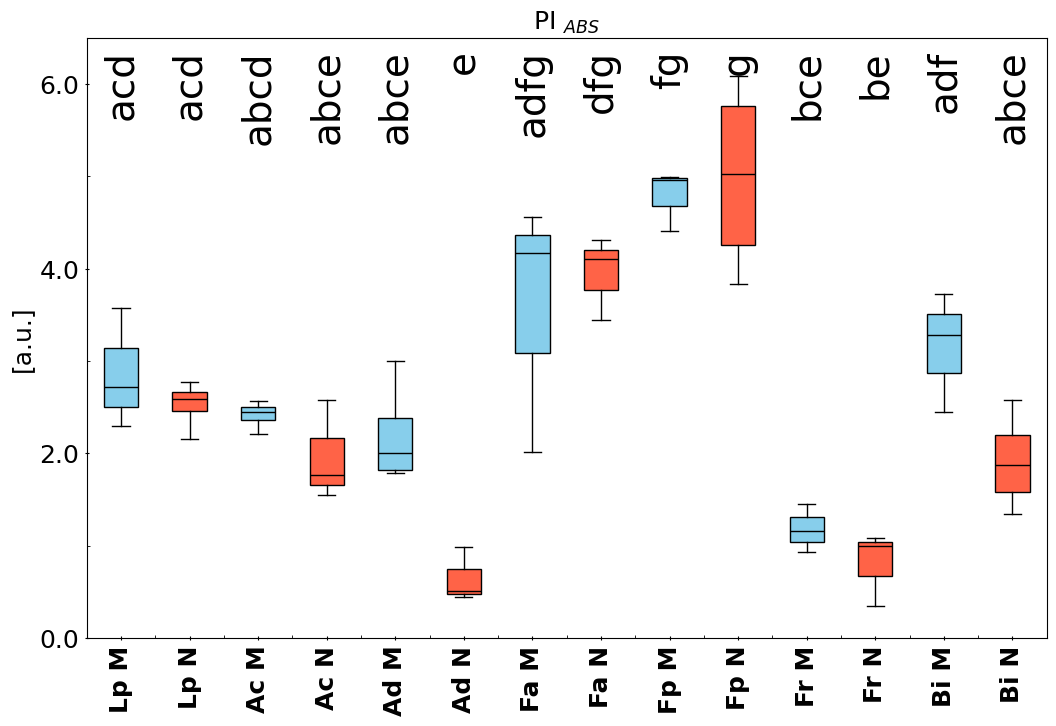

In [422]:
fig,ax=plt.subplots(figsize=(12,8))

if sorting:
  # For sorting !
  labels = group_order #pd.unique(data[variant]).astype(str)
  # create categorical data type and set categorical column as new data type
  dtype = pd.CategoricalDtype(labels, ordered=False)
  data[sorting_labels] = data[sorting_labels].astype(dtype)
  labels_new = [i[5:] for i in labels]

# Ensure 'Value' column is numeric before plotting
data['Value'] = pd.to_numeric(data['Value'], errors='coerce') # Converts to numeric, invalid values become NaN

bp_dict = data.boxplot(column=col_for_data, by=sorting_labels, ax=ax, fontsize=18, patch_artist = True,
            medianprops=dict(color='black'), # the median line
            boxprops=dict(color='black'),
            whiskerprops=dict(color='black')
            )
draw_letters(y_height, False, 1, fsize=28, rotation=90)

fill_colors = ['tomato', 'skyblue', 'navy' ] # cwetowe
colors = ['white', 'yellowgreen', ]#'blue', 'dodgerblue']
children = []

for b in range(22):
  for a in range(2): # broj cwetowe
    repeated = np.tile(np.concatenate([np.repeat(i, j) for i, j
                                       # the median line
          in zip([fill_colors[a], 'black', 'black', 'black'], [1, 4, 1, 1])]), 1)
    colors = np.append(repeated, colors)

# OJIP graph
from matplotlib.patches import PathPatch

for patch, color in zip(bp_dict.get_children(), colors):
  if isinstance(patch, PathPatch):
    patch.set(facecolor = color)

# OJIP graph
children = [bp_dict.get_children()[0], bp_dict.get_children()[7], bp_dict.get_children()[14], ]
#            bp_dict.get_children()[14], bp_dict.get_children()[28]]

#ax.set_xticklabels([i[5:] for i in group_order], fontsize=24, style='normal', weight='bold', rotation=90)
ax.set_xticks(np.arange(1., 1.*(len(group_order) + 1), 1.), labels=group_order, fontsize=12)
#[i[:2] for i in group_order[::2]]
ax.set_xticklabels(group_order, fontsize=18, style='normal', weight='bold', rotation=90)

plt.ylim(ymax=y_height)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=18, rotation=0)
ax.set_ylabel(y_label, fontsize=18)

ax.set(title='', ylabel=y_label, xlabel='')
ax.set_title(title_main, fontsize=18, rotation=0)
""""""
#labels = ['8:30 h (20 $^o$C)', '12:30 h (30 $^o$C)', ]
labels = ['24.IV (before c.s.)', '28.IV (after c.s.)', ]
# OJIP graph

#ax.legend(handles=children, labels=labels,
#          loc='lower center', fontsize=22)

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
minor_locator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minor_locator)

# minor ticks
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
ax.yaxis.set_minor_locator(MultipleLocator(y_dist/2))
ax.tick_params(which="major", direction="inout")
ax.tick_params(which="minor", direction="in")

# Етикети за X оста
#fertilization_labels = ["A", "B", "D", "F", "G", ]

  #['L. albus mono', 'L. albus mixed', 'V. faba mono', 'V. faba mixed', 'T. aestivum mono', 'T. aestivum + V. faba', 'T. aestivum + L. albus']
ax.set_xticks(np.arange(1, len(group_order)+1, 1))
ax.set_xticklabels(group_order, size=18, rotation=90, ha='center')
"""
# Добавяне на вертикални линии, които да разделят групите по Irrigation
for i in range(0, 5):
    ax.axvline(x=2.5 + i*2, color='lightgray', linestyle='-', linewidth=1)

# Добавяне на текстови етикети за Irrigation
kwargs = {'size': 18, 'ha': 'center', 'va': 'center', 'transform': ax.get_xaxis_transform()}
ax.text(2, -.125, '0% Irrigation', **kwargs)
ax.text(5, -.125, '50% Irrigation', **kwargs)
ax.text(8, -.125, '100% Irrigation', **kwargs)
"""
# OJIP graph
plt.grid(False)
ax.yaxis.grid(False)
#ax.xaxis.grid(True, linestyle='-', which='minor', color='lightgrey', alpha=1)
fig.suptitle('')
fig.savefig(str(indexes.index(parameter)) +  '_' + ('_').join(parameter.split('/')) + '_' + csv_file.split('.')[0] + '.jpg',
            dpi=600, bbox_inches='tight')